# K-Nearest Neighbors

In [2]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

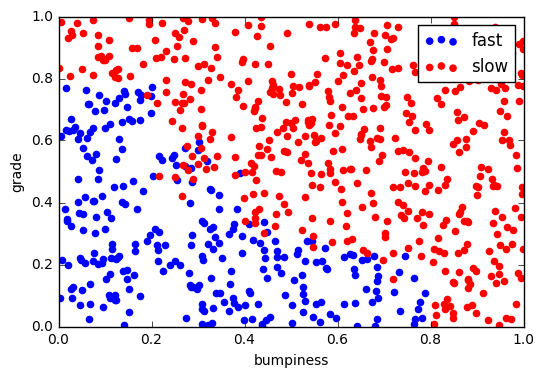

In [4]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from time import time

In [31]:
clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

training time: 0.004 s


In [32]:
t0 = time()
print "The K-Nearest Neithbors Score: %f" % clf.score(features_test, labels_test)
print "prediction time:", round(time()-t0, 3), "s"

The K-Nearest Neithbors Score: 0.940000
prediction time: 0.01 s


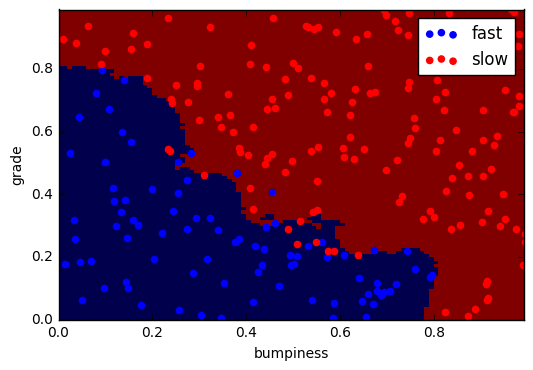

In [33]:
plt.clf()
prettyPicture(clf, features_test, labels_test)
plt.show()